In [33]:
import timm
import copy
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix
from torch.utils.data import DataLoader, ConcatDataset, random_split

In [15]:
transform = transforms.Compose([transforms.Resize((224, 224)), transforms.ToTensor(), transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])])

dataset = datasets.ImageFolder(root='../non-keyframes/energy_images', transform=transform)

total_size = len(dataset)
train_size = int(total_size * 0.8) 
validation_size = int(total_size * 0.1) 
test_size = total_size - train_size - validation_size
generator = torch.Generator().manual_seed(0) 
train_dataset, validation_dataset, test_dataset = random_split(dataset, [train_size, validation_size, test_size], generator=generator)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(validation_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [9]:
print(len(train_dataset))
print(len(validation_dataset))
print(len(test_dataset))

410
51
52


In [16]:
label_list = [0, 0, 0, 0]
for item, label in test_dataset:
    label_list[label] += 1

In [17]:
label_list

[118, 439, 579, 569]

[]

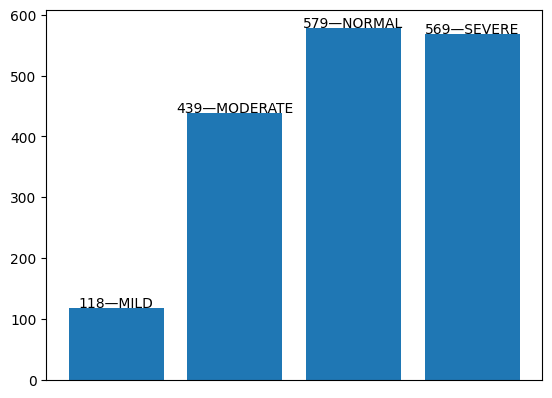

In [32]:
import matplotlib.pyplot as plt

labels = ['MILD', 'MODERATE', 'NORMAL', 'SEVERE']
indices = range(len(label_list))

# Plotting the values as bars
plt.bar(indices, label_list)
for i, value in enumerate(label_list):
    plt.text(i, value + 0.2, f'{str(value)}—{labels[i]}', ha='center')

plt.gca().axes.get_xaxis().set_ticks([])

In [34]:
transform = transforms.Compose([transforms.Resize((224, 224)), transforms.ToTensor(), transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])])

dataset = datasets.ImageFolder(root='../non-keyframes/energy_images', transform=transform)

class_datasets = {}
for i in range(len(dataset)):
    img, label = dataset[i]
    if label not in class_datasets:
        class_datasets[label] = []
    class_datasets[label].append(img)

oversampled_datasets = []
majority_class_len = max(len(class_datasets[label]) for label in class_datasets)
for label, data in class_datasets.items():
    if len(data) < majority_class_len:
        oversampled_data = resample(data,
                                    replace=True,
                                    n_samples=majority_class_len - len(data),
                                    random_state=0)
        class_datasets[label].extend(oversampled_data)
    oversampled_datasets.append(class_datasets[label])

oversampled_dataset = ConcatDataset([torch.utils.data.TensorDataset(torch.stack(images), torch.tensor([label]*len(images))) for label, images in enumerate(oversampled_datasets)])

total_size = len(oversampled_dataset)
train_size = int(total_size * 0.8) 
validation_size = int(total_size * 0.1) 
test_size = total_size - train_size - validation_size
generator = torch.Generator().manual_seed(0) 
train_dataset, validation_dataset, test_dataset = random_split(oversampled_dataset, [train_size, validation_size, test_size], generator=generator)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(validation_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [36]:
print(len(oversampled_dataset))
print(len(train_dataset))
print(len(validation_dataset))
print(len(test_dataset))

23580
18864
2358
2358
